## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier as DTClassifier
from sklearn.model_selection import train_test_split as TTS

import graphviz

In [2]:
data = pd.read_csv('4.data.txt')
data.shape

(467, 34)

In [3]:
data.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [4]:
data.raceethnicity.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.raceethnicity.value_counts()

White                     216
Black                     127
Hispanic/Latino            65
Unknown                    14
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

In [7]:
# data = data[data.raceethnicity != 'Native American']

### Split dataset

In [8]:
trainset, testset = TTS(data, test_size=0.3, stratify=data['raceethnicity'], random_state=42)
print(trainset.shape, testset.shape)

(305, 34) (131, 34)


### Decision Tree

In [9]:
dt = DTClassifier(max_depth = 3)
dt.fit(trainset[['pov']], trainset['raceethnicity'])

DecisionTreeClassifier(max_depth=3)

In [10]:
from sklearn import tree

def plot_tree(model, features, class_names):
    dot_data = tree.export_graphviz(
        model,
        out_file = None,
        feature_names = features,
        class_names = class_names,
        filled = True,
        rounded = True,
        special_characters = True
    )
    
    graph = graphviz.Source(dot_data)
    
    graph.render('decision_tree')
    
    return graph

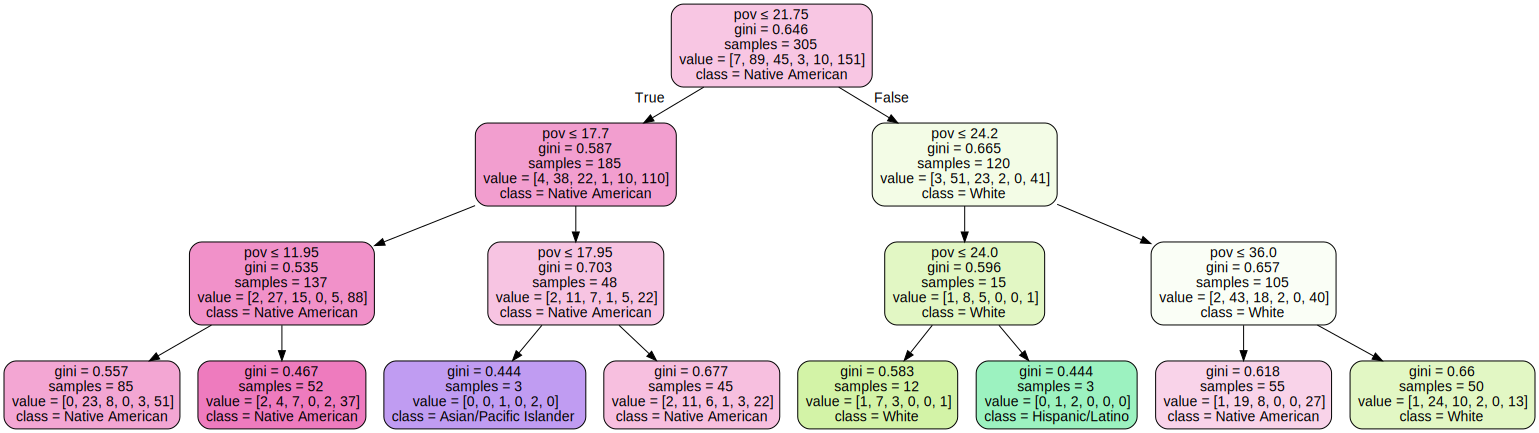

In [11]:
plot_tree(dt, ['pov'], data.raceethnicity.unique())

### Predictions 

In [23]:
import numpy

predictionsTrain = dt.predict(trainset[['pov']])

unique, counts = numpy.unique(predictionsTrain, return_counts=True)
dict(zip(unique, counts))


{'Black': 62, 'Hispanic/Latino': 3, 'Unknown': 3, 'White': 237}

In [26]:
predictionsTest = dt.predict(testset[['pov']])

unique, counts = numpy.unique(predictionsTest, return_counts=True)
dict(zip(unique, counts))

{'Black': 27, 'Unknown': 2, 'White': 102}

In the Train set is more diversion. White and black are in both sets the most common value. 

### Accuracy

In [27]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (predictions == actuals).sum() / len(actuals)

In [28]:
accuracyTrain = calculate_accuracy(predictionsTrain, trainset.raceethnicity)
accuracyTest = calculate_accuracy(predictionsTest, testset.raceethnicity)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.5639344262295082
Accuracy on test set 0.5190839694656488


Accuracy is low, it is not reliable.